In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
from supervised.automl import AutoML
import category_encoders as ce
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.metrics import median_absolute_error
print('Imported sci-kit learn and AutoML libraries!')

Imported sci-kit learn and AutoML libraries!


## Let's compare some other AutoML libraries to see if we can improve our results any further

In [2]:
irl =  pd.read_csv('sub-dub-encoded.csv', index_col = 'Unnamed: 0')

In [3]:
irl1 = pd.read_csv('initial-ml-test-dub-1.csv', index_col = 'Unnamed: 0')

In [4]:
irl1.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,3.568079
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,0.255856
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,3.002563
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,1.206681
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,1.815296


In [5]:
irl.drop(columns = ['Longitude', 'Latitude', 'LogPrice (€)'], inplace = True)

In [6]:
irl1.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,3.568079
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,0.255856
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,3.002563
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,1.206681
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,1.815296


In [7]:
irl.head()

,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,Eircode,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool
207901,0,1,2014,1,601864.418417,0,899721.0,628715.337138,7.541595,0.492120,1.438826,0.156609
207905,1,0,2014,1,651335.338306,0,1661424.0,651335.338306,6.817210,0.100996,2.784711,0.831639
207916,0,1,2014,1,741771.837018,1,597863.0,628715.337138,7.799393,0.683556,3.098765,0.968202
207925,1,1,2014,1,414681.974545,0,334587.0,406163.221538,8.400802,0.319564,1.909348,0.262801
207929,1,2,2014,1,570683.081926,1,305308.0,411979.725512,2.225835,0.085034,0.909828,0.597393


In [8]:
irl = irl.join(irl1[['Longitude', 'Latitude', 'Price (€)']])

In [9]:
# predicting standard
irl['LogPrice (€)'] = np.log(irl['Price (€)'])
irl.drop(columns = ['Price (€)'], inplace = True)
irl.head()

,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,Eircode,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool,Longitude,Latitude,LogPrice (€)
207901,0,1,2014,1,601864.418417,0,899721.0,628715.337138,7.541595,0.492120,1.438826,0.156609,-6.335665,53.307878,13.010761
207905,1,0,2014,1,651335.338306,0,1661424.0,651335.338306,6.817210,0.100996,2.784711,0.831639,-6.238896,53.288227,12.894207
207916,0,1,2014,1,741771.837018,1,597863.0,628715.337138,7.799393,0.683556,3.098765,0.968202,-6.312400,53.291600,12.186050
207925,1,1,2014,1,414681.974545,0,334587.0,406163.221538,8.400802,0.319564,1.909348,0.262801,-6.372213,53.353853,11.461632
207929,1,2,2014,1,570683.081926,1,305308.0,411979.725512,2.225835,0.085034,0.909828,0.597393,-6.263792,53.366311,11.931636


In [10]:
# this function finds all values that fall within internationally accepted +-10% of actual prices in our predictions
# we can modify the threshold as we feel the need to here
def accuracy_threshold(test, pred, num):
    test = np.array(test)
    pred = np.array(pred)
# get within x% of actual price , not within log price as this will be misleading / incorrect
    test = np.exp(test)
    pred = np.exp(pred)
    count = 0
    for i in range(len(pred)):
        if test[i] != 0:  
            ten = test[i] * num
            res = test[i] - pred[i]
        else:
            res = 0
            ten = 0
        
        if res < 0:
            res = res * -1
        else:
            res = res
            
        if res <= ten:
            count += 1
        else:
            continue
    return (count / len(test))

In [11]:
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold

## 2021

### TPOT

In [12]:
specific21 = irl[irl['Year'] > 2017]

In [13]:
train_21 = specific21[specific21['Year'] < 2021]

In [14]:
test_21 = specific21[specific21['Year'] == 2021]

In [15]:
x_train_21 = train_21.loc[:, train_21.columns != 'LogPrice (€)']
y_train_21 = train_21['LogPrice (€)']

In [16]:
x_test_21 = test_21.loc[:, test_21.columns != 'LogPrice (€)']
y_test_21 = test_21['LogPrice (€)']

In [17]:
x_t_21 = x_test_21

In [18]:
#cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
# define search
model = TPOTRegressor(max_time_mins = 6)
model1 = model.fit(x_train_21, y_train_21)

In [19]:
#model1.export('tpot_2021_pipeline.py')

In [20]:
# calculated values
from sklearn.metrics import mean_squared_error
y_predicted_21 = model1.predict(x_test_21)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21, y_predicted_21)
print('MSE for TPOT AutoML 2021 is: ' + str(mse))

MSE for TPOT AutoML 2021 is: 0.10578430890121511


In [21]:
rmse = mean_squared_error(y_test_21, y_predicted_21, squared=False)
print('RMSE for TPOT AutoML 2021 is: ' + str(rmse))

RMSE for TPOT AutoML 2021 is: 0.3252449982724025


In [22]:
median_se = np.square(np.subtract(y_test_21, y_predicted_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.12806837959357864


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_21, y_predicted_21)
print("MAPE for TPOT AutoML 2021 is: " + str(mape))

MAPE for TPOT AutoML 2021 is: 0.01642166850481989


In [24]:
acc = accuracy_threshold(y_test_21, y_predicted_21, 0.1)

In [25]:
import shap
#explainer = shap.Explainer(model1.predict, x_train_21)
#shap_values = explainer(x_train_21)
#shap.summary_plot(shap_values, x_train_21, plot_type = 'bar')

In [26]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df11 = pd.DataFrame(columns=cnames)

df11 = df11.append({'Algorithm': 'TPOT AutoML',
            'Year': 2021,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [27]:
dfreal1 = pd.DataFrame(y_test_21.values)
dfpred1 = pd.DataFrame(y_predicted_21)

### 2020

In [28]:
specific20 = irl[irl['Year'] > 2016]

In [29]:
test_20 = specific20[specific20['Year'] == 2020]
train_20 = specific20[specific20['Year'] < 2020]

x_train_20 = train_20.loc[:, train_20.columns != 'LogPrice (€)']
y_train_20 = train_20['LogPrice (€)']

x_test_20 = test_20.loc[:, test_20.columns != 'LogPrice (€)']
y_test_20 = test_20['LogPrice (€)']

In [30]:
x_t_20 = x_test_20

In [31]:
model = TPOTRegressor(max_time_mins = 6)
model2 = model.fit(x_train_20, y_train_20)

In [32]:
#model2.export('tpot_2020_pipeline.py')

In [33]:
y_predicted_20 = model1.predict(x_test_20)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20, y_predicted_20)
print('MSE for TPOT AutoML 2020 is: ' + str(mse))

MSE for TPOT AutoML 2020 is: 0.03006525874071164


In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_20, y_predicted_20)
print("MAPE for TPOT AutoML 2020 is: " + str(mape))

MAPE for TPOT AutoML 2020 is: 0.008094740202828795


In [35]:
median_se = np.square(np.subtract(y_test_20, y_predicted_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.05535986090449008


In [36]:
rmse = mean_squared_error(y_test_20, y_predicted_20, squared=False)
print('RMSE for TPOT AutoML 2020 is: ' + str(rmse))

RMSE for TPOT AutoML 2020 is: 0.17339336417727075


In [37]:
acc = accuracy_threshold(y_test_20, y_predicted_20, 0.1)

In [38]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df12 = pd.DataFrame(columns=cnames)

df12 = df12.append({'Algorithm': 'TPOT AutoML',
            'Year': 2020,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [39]:
dfreal2 = pd.DataFrame(y_test_20.values)
dfpred2 = pd.DataFrame(y_predicted_20)

In [40]:
#explainer = shap.Explainer(model2.predict, x_train_20)
#shap_values = explainer(x_train_20)
#shap.summary_plot(shap_values, x_train_20, plot_type = 'bar')

### 2019

In [41]:
specific19 = irl[irl['Year'] > 2015]

In [42]:
test_19 = specific19[specific19['Year'] == 2019]
train_19 = specific19[specific19['Year'] < 2019]
x_train_19 = train_19.loc[:, train_19.columns != 'LogPrice (€)']
y_train_19 = train_19['LogPrice (€)']
x_test_19 = test_19.loc[:, test_19.columns != 'LogPrice (€)']
y_test_19 = test_19['LogPrice (€)']

In [43]:
x_t_19 = x_test_19

In [44]:
model = TPOTRegressor(max_time_mins = 6)
# perform the search // takes ages to run!
model3 = model.fit(x_train_19, y_train_19)

In [45]:
#model3.export('tpot_2019_pipeline.py')

In [46]:
y_predicted_19 = model1.predict(x_test_19)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_predicted_19)
print('MSE for TPOT AutoML 2019 is: ' + str(mse))

MSE for TPOT AutoML 2019 is: 0.022920023313453834


In [47]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_19, y_predicted_19)
print("MAPE for TPOT AutoML 2019 is: " + str(mape))

MAPE for TPOT AutoML 2019 is: 0.007502104689802522


In [48]:
median_se = np.square(np.subtract(y_test_19, y_predicted_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.06074037291693062


In [49]:
rmse = mean_squared_error(y_test_19, y_predicted_19, squared = False)
print('RMSE for TPOT AutoML 2019 is: ' + str(rmse))

RMSE for TPOT AutoML 2019 is: 0.15139360393838913


In [50]:
acc = accuracy_threshold(y_test_19, y_predicted_19, 0.1)

In [51]:
#explainer = shap.Explainer(model3.predict, x_train_19)
#shap_values = explainer(x_train_19)
#shap.summary_plot(shap_values, x_train_19, plot_type = 'bar')

In [52]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df13 = pd.DataFrame(columns = cnames)

df13 = df13.append({'Algorithm': 'TPOT AutoML',
            'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [53]:
dfreal3 = pd.DataFrame(y_test_19.values)
dfpred3 = pd.DataFrame(y_predicted_19)

### 2018

In [54]:
specific18 = irl[irl['Year'] > 2014]
test_18 = specific18[specific18['Year'] == 2018]
train_18 = specific18[specific18['Year'] < 2018]

x_train_18 = train_18.loc[:, train_18.columns != 'LogPrice (€)']
y_train_18 = train_18['LogPrice (€)']
x_test_18 = test_18.loc[:, test_18.columns != 'LogPrice (€)']
y_test_18 = test_18['LogPrice (€)']

In [55]:
x_t_18 = x_test_18

In [56]:
model = TPOTRegressor(max_time_mins = 6)
# perform the search // takes ages to run!
model4 = model.fit(x_train_18, y_train_18)

In [57]:
#model4.export('tpot_2018_pipeline.py')

In [58]:
y_predicted_18 = model1.predict(x_test_18)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_predicted_18)
print('MSE for TPOT AutoML 2018 is: ' + str(mse))

MSE for TPOT AutoML 2018 is: 0.040060239406536725


In [59]:
rmse = mean_squared_error(y_test_18, y_predicted_18, squared = False)
print('RMSE for TPOT AutoML 2018 is: ' + str(rmse))

RMSE for TPOT AutoML 2018 is: 0.20015054185921338


In [60]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_18, y_predicted_18)
print("MAPE for TPOT AutoML 2018 is: " + str(mape))

MAPE for TPOT AutoML 2018 is: 0.008752316640225138


In [61]:
median_se = np.square(np.subtract(y_test_18, y_predicted_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.053687014462795446


In [62]:
acc = accuracy_threshold(y_test_18, y_predicted_18, 0.1)

In [63]:
#explainer = shap.Explainer(model4.predict, x_train_18)
#shap_values = explainer(x_train_18)
#shap.summary_plot(shap_values, x_train_18, plot_type = 'bar')

In [64]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df14 = pd.DataFrame(columns=cnames)

df14 = df14.append({'Algorithm': 'TPOT AutoML',
            'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [65]:
dfreal4 = pd.DataFrame(y_test_18.values)
dfpred4 = pd.DataFrame(y_predicted_18)

### 2017

In [66]:
specific17 = irl[irl['Year'] > 2013]
test_17 = specific17[specific17['Year'] == 2017]
train_17 = specific17[specific17['Year'] < 2017]

x_train_17 = train_17.loc[:, train_17.columns != 'LogPrice (€)']
y_train_17 = train_17['LogPrice (€)']
x_test_17 = test_17.loc[:, test_17.columns != 'LogPrice (€)']
y_test_17 = test_17['LogPrice (€)']

In [67]:
x_t_17 = x_test_17

In [68]:
model = TPOTRegressor(max_time_mins = 6)
# perform the search // takes ages to run!
model5 = model.fit(x_train_17, y_train_17)

In [69]:
#model5.export('tpot_2017_pipeline.py')

In [70]:
y_predicted_17 = model1.predict(x_test_17)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_predicted_17)
print('MSE for TPOT AutoML 2017 is: ' + str(mse))

MSE for TPOT AutoML 2017 is: 0.10310183822709278


In [71]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_17, y_predicted_17)
print("MAPE for TPOT AutoML 2017 is: " + str(mape))

MAPE for TPOT AutoML 2017 is: 0.016996704161168878


In [72]:
median_se = np.square(np.subtract(y_test_17, y_predicted_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.14350896765926607


In [73]:
rmse = mean_squared_error(y_test_17, y_predicted_17, squared=False)
print('RMSE for TPOT AutoML 2017 is: ' + str(rmse))

RMSE for TPOT AutoML 2017 is: 0.32109474960997536


In [74]:
acc = accuracy_threshold(y_test_17, y_predicted_17, 0.1)

In [75]:
#explainer = shap.Explainer(model5.predict, x_train_17)
#shap_values = explainer(x_train_17)
#shap.summary_plot(shap_values, x_train_17, plot_type = 'bar')

In [76]:
dfreal5 = pd.DataFrame(y_test_17.values)
dfpred5 = pd.DataFrame(y_predicted_17)

In [77]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df15 = pd.DataFrame(columns=cnames)

df15 = df15.append({'Algorithm': 'TPOT AutoML',
            'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [78]:
vis1 = pd.concat([df11, df12, df13, df14, df15], ignore_index=True)

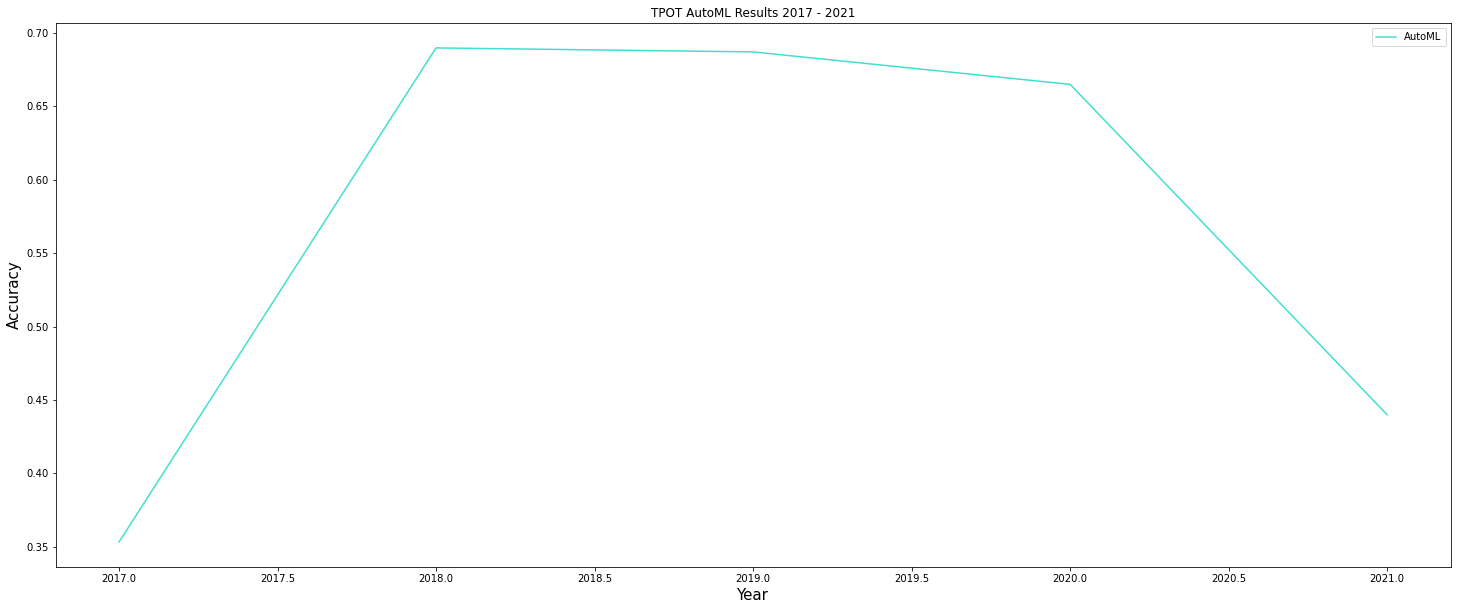

In [79]:
# don't need cross validation same training due to set intervals?
fig, ax = plt.subplots(figsize = (25, 10))
plt.plot(vis1['Year'], vis1['Accuracy'], label = 'AutoML', color = 'turquoise')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('TPOT AutoML Results 2017 - 2021')
plt.legend()
plt.show()

fig.savefig('performance-overtime-dubtpot.png')

In [80]:
print("Mean accuracy for TPOT AutoML over period 2017-2021 is: " + str(vis1['Accuracy'].mean()))

Mean accuracy for TPOT AutoML over period 2017-2021 is: 0.5670588668697814


In [81]:
actual = pd.concat([dfreal1, dfreal2, dfreal3, dfreal4, dfreal5], ignore_index = True)
actual.rename(columns = {0: 'Actual'}, inplace = True)
actual.head()

,Actual
0,12.624668
1,12.747268
2,13.072690
3,12.797276
4,12.653239


In [82]:
pred = pd.concat([dfpred1, dfpred2, dfpred3, dfpred4, dfpred5], ignore_index = True)
pred.rename(columns={0: 'Predicted'}, inplace = True)
pred.head()

,Predicted
0,12.628608
1,12.627657
2,12.369009
3,12.744685
4,12.627657


In [83]:
actualvpred = actual.join(pred)

In [84]:
actualvpred.head()

,Actual,Predicted
0,12.624668,12.628608
1,12.747268,12.627657
2,13.072690,12.369009
3,12.797276,12.744685
4,12.653239,12.627657


In [85]:
exp = np.exp(actualvpred)

In [86]:
exp.shape

(3287, 2)

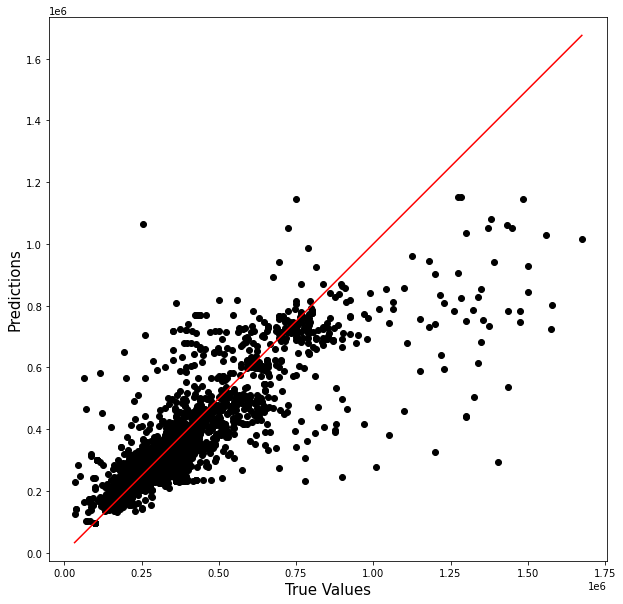

In [105]:
# plot predicted vs actual
## this is using actual prices hence adjusted scale compared to mljar plot
fig, ax = plt.subplots(figsize = (10, 10))
plt.scatter(exp['Actual'], exp['Predicted'], c = 'black')

p1 = max(max(exp['Predicted']), max(exp['Actual']))
p2 = min(min(exp['Predicted']), min(exp['Actual']))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
#plt.title('TPOT AutoML Actual Vs Predicted Values')
plt.axis('equal')
plt.show()

fig.savefig('actualvpred-dubtpot.png')

In [88]:
x_t_21 = x_t_21.reset_index()
x_t_20 = x_t_20.reset_index()
x_t_19 = x_t_19.reset_index()
x_t_18 = x_t_18.reset_index()
x_t_17 = x_t_17.reset_index()

x_t_21.drop(columns = ['index'], inplace = True)
x_t_20.drop(columns = ['index'], inplace = True)
x_t_19.drop(columns = ['index'], inplace = True)
x_t_18.drop(columns = ['index'], inplace = True)
x_t_17.drop(columns = ['index'], inplace = True)

In [89]:
l1 = dfreal1.join(x_t_21[['Longitude', 'Latitude']])
l2 = dfreal2.join(x_t_20[['Longitude', 'Latitude']])
l3 = dfreal3.join(x_t_19[['Longitude', 'Latitude']])
l4 = dfreal4.join(x_t_18[['Longitude', 'Latitude']])
l5 = dfreal5.join(x_t_17[['Longitude', 'Latitude']])

plots = pd.concat([l1, l2, l3, l4, l5], ignore_index=True)
plots.head()

,0,Longitude,Latitude
0,12.624668,-6.433316,53.287576
1,12.747268,-6.434182,53.286440
2,13.072690,-6.127101,53.397993
3,12.797276,-6.154503,53.404602
4,12.653239,-6.434182,53.286440


In [90]:
plots.rename(columns = {0 : 'Actual'}, inplace = True)

In [91]:
plots.head()

,Actual,Longitude,Latitude
0,12.624668,-6.433316,53.287576
1,12.747268,-6.434182,53.286440
2,13.072690,-6.127101,53.397993
3,12.797276,-6.154503,53.404602
4,12.653239,-6.434182,53.286440


In [92]:
plotscomp = plots.join(pred)
plotscomp.head()

,Actual,Longitude,Latitude,Predicted
0,12.624668,-6.433316,53.287576,12.628608
1,12.747268,-6.434182,53.286440,12.627657
2,13.072690,-6.127101,53.397993,12.369009
3,12.797276,-6.154503,53.404602,12.744685
4,12.653239,-6.434182,53.286440,12.627657


In [93]:
exp1 = np.exp(plotscomp[['Actual', 'Predicted']])

In [94]:
exp1 = exp1.join(plotscomp[['Longitude', 'Latitude']])

In [95]:
exp1.head()

,Actual,Predicted,Longitude,Latitude
0,303965.0,305164.897850,-6.433316,53.287576
1,343612.0,304875.072225,-6.434182,53.286440
2,475770.0,235392.264908,-6.127101,53.397993
3,361232.0,342725.483227,-6.154503,53.404602
4,312775.0,304875.072225,-6.434182,53.286440


In [96]:
import geopandas as gpd
ROI_map = gpd.read_file('counties\counties.shp')  #reading the shape file for our maps 
ROI_map.head(1)

2022-04-10 15:59:20,074 fiona._env ERROR Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
2022-04-10 15:59:20,074 fiona._env ERROR Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


,OSM_ID,NAME_TAG,NAME_GA,NAME_EN,ALT_NAME,ALT_NAME_G,LOGAINM_RE,OSM_USER,OSM_TIMEST,ATTRIBUTIO,T_IE_URL,AREA,LATITUDE,LONGITUDE,EPOCH_TSTM,geometry
0,-338539.0,Mayo,Contae Mhaigh Eo,County Mayo,None,None,100023,Polarbear,2009-11-28 21:59:01+01,None,http://www.townlands.ie/mayo,5.596522e+09,53.924239,-9.385225,1.259442e+09,"MULTIPOLYGON (((-10.13689 54.10969, -10.13601 ..."


In [97]:
dub = ROI_map.loc[ROI_map['NAME_TAG'] == 'Dublin']
dub

,OSM_ID,NAME_TAG,NAME_GA,NAME_EN,ALT_NAME,ALT_NAME_G,LOGAINM_RE,OSM_USER,OSM_TIMEST,ATTRIBUTIO,T_IE_URL,AREA,LATITUDE,LONGITUDE,EPOCH_TSTM,geometry
23,-282800.0,Dublin,Contae Ãtha Cliath,County Dublin,None,None,100002,mackerski,2009-10-07 01:32:34+02,None,http://www.townlands.ie/dublin,9.290204e+08,53.392222,-6.283976,1.254872e+09,"MULTIPOLYGON (((-6.54689 53.27948, -6.54642 53..."


In [98]:
num = 0.1
lst = []
test = np.array(exp1['Actual'])
pred = np.array(exp1['Predicted'])
count = 0
for i in range(len(pred)):
    if test[i] != 0:  
        ten = test[i] * num
        res = test[i] - pred[i]
    else:
        res = 0
        ten = 0
        
    if res < 0:
        res = res * -1
    else:
        res = res
            
    if res <= ten:
        lst.append(1)
    else:
        lst.append(0)

In [99]:
exp1['Accurate'] = lst

In [100]:
exp1.head()

,Actual,Predicted,Longitude,Latitude,Accurate
0,303965.0,305164.897850,-6.433316,53.287576,1
1,343612.0,304875.072225,-6.434182,53.286440,0
2,475770.0,235392.264908,-6.127101,53.397993,0
3,361232.0,342725.483227,-6.154503,53.404602,1
4,312775.0,304875.072225,-6.434182,53.286440,1


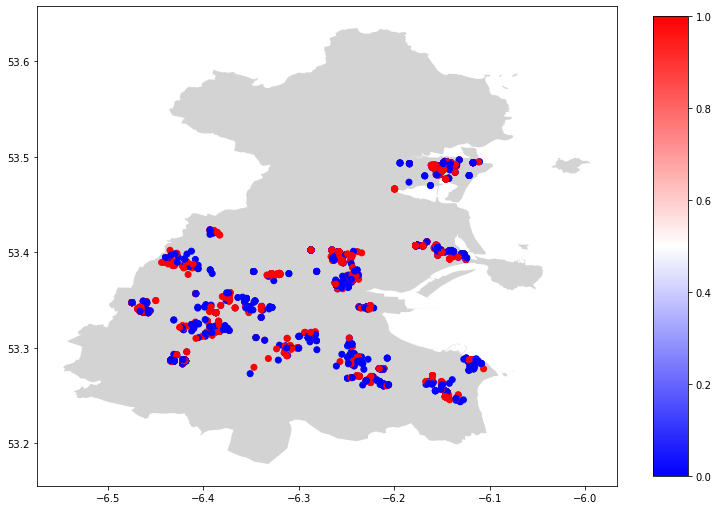

In [102]:
### RED = accurate , BLUE = Inaccurate
fig, ax = plt.subplots(figsize = (13, 13))
# O'Connell St. lat is 53.34975, and the longitude is -6.260113
dub.plot(ax = ax, color = 'lightgrey')
#ax.axhline(y = 53.34975, color = 'r', linestyle = '--')
plt.scatter(x = exp1['Longitude'], y = exp1['Latitude'], c = exp1['Accurate'], cmap = 'bwr')
#plt.title('Plot of Locations of Accurately Predicted properties used in test dataset')
plt.colorbar(shrink = 0.65, aspect = 20 * 0.65)
plt.show()

fig.savefig('dublinaccurates.png')